<a href="https://colab.research.google.com/github/MateusSampaio1/Alura-Voz/blob/main/Notebooks/1%C2%B0Semana/Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1° Semana de Data Science (2022)**

**Contextualização e Objetivo do projeto**
  
  Recebi o uma demanda da empresa de Telecomunicações **Alura Voz** na qual buscava reduzir a **taxa de evasão** dos clientes, tambem conhecida como **Churn rate**. Essa taxa basicamente aborda a quantidade de clientes, e consequentemente receita, perdidos em um determinado período de tempo.
  
  Para que fosse possível atender essa solicitação, a empresa me concedeu o acesso a um conjunto de dados, via API, que contempla um determinado período e possui informações relativas a clientes e ex clientes da companhia.

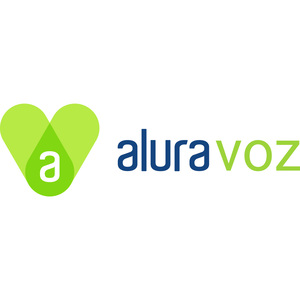

**Definindo as etapas do projeto.**

Esse projeto pode ser dividido em quatro etapas, sendo elas:
+ **Tramento dos dados.**
  - Importação das bibliotecas e ferramentas utilizadas no projeto;
  - Visualização e aplicação da técnica de desagrupamentos dos dados(`json_normalize`);
  - Inclusão de uma nova coluna;
  - Tradução do DataFrame, linhas e colunas;
  -  Verificação e tratamento de inconsistência.

+ **Análise exploratória dos dados.**
  - Análise da variável **Target**;
  - Análise da interação da variável alvo com as demais do DataFrame;
  - Análise da correlação entre as variáveis.

+ **Modelagem dos dados.**
  - Enconding;
  - Definição de uma base line;
  - Aplicação do modelo RandomForestClassifier e AdaBoostClassifier em três cenários distintos;
      - Mantendo o desbalanceamento;
      - Utilizando o método de OverSampling;
      - Utilizando o método de UnderSampling.
      
+ **Conclusão.**
    - Conclusões gerais sobre o problema definido.

In [1]:
# Realizando a importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configurando para mostrar mais colunas
pd.set_option('display.max_columns', 50)

In [3]:
# Obtendo e  carregando os dados na variável df
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
df = pd.read_json(uri) 
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Mostrando o tamanho do DataFrame
print('O DataFrame possui %d linhas e %d colunas'% df.shape)

O DataFrame possui 7267 linhas e 6 colunas


In [5]:
# Observando os dados contidos nos dicionários.
df['customer'][0]

{'Dependents': 'Yes',
 'Partner': 'Yes',
 'SeniorCitizen': 0,
 'gender': 'Female',
 'tenure': 9}

In [6]:
# Observando os dados contidos nos dicionários.
df['phone'][0]

{'MultipleLines': 'No', 'PhoneService': 'Yes'}

In [7]:
# Observando os dados contidos nos dicionários.
df['internet'][0]

{'DeviceProtection': 'No',
 'InternetService': 'DSL',
 'OnlineBackup': 'Yes',
 'OnlineSecurity': 'No',
 'StreamingMovies': 'No',
 'StreamingTV': 'Yes',
 'TechSupport': 'Yes'}

In [8]:
# Observando os dados contidos nos dicionários.
df['account'][0]

{'Charges': {'Monthly': 65.6, 'Total': '593.3'},
 'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check'}

## Normalizando dados

> Será necessário utilizar o json_normalize para obter as informações agrupadas nas variáveis customer, phone, internet e account.

In [9]:
#Extraindo as informações contidas na coluna Customer
df_customer = pd.json_normalize(data = df['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [10]:
#Extraindo as informações contidas na coluna Phone
df_phone = pd.json_normalize(data = df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [11]:
#Extraindo as informações contidas na coluna Internet
df_internet = pd.json_normalize(data = df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [12]:
# Extraindo as informações contidas na coluna Account
df_account = pd.json_normalize(data = df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [13]:
# Juntando os dados extraídos com os dados originais.
df = pd.merge(left = df, right = df_customer, left_index = True, right_index = True) #Juntando o df_customer.
df = pd.merge(left = df, right = df_phone, left_index = True, right_index = True) #Juntando o df_phone. 
df = pd.merge(left= df, right = df_internet, left_index = True, right_index = True) #Juntando o df_internet. 
df = pd.merge(left = df, right = df_account, left_index = True, right_index = True) #Juntando o df_account. 

df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Com a junção destas novas colunas ao df, as colunas customer, phone, internet e account podem ser removidas do Dataframe sem maiores problemas.

In [14]:
# Removendo as colunas
df.drop(['customer', 'phone', 'account', 'internet'], axis = 1, inplace = True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Traduzindo os nome das colunas 

In [15]:
# Mostrando os nomes das colunas presentes no DataFrame.
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [16]:
# Traduzindo os nomes das colunas.
df.rename(columns = {'customerID': 'ID_cliente', 
                    'Churn':'Evasao', 
                    'gender':'Genero', 
                    'SeniorCitizen':'Idoso',
                    'Partner':'Parceiro',
                    'Dependents':'Dependentes', 
                    'tenure':'Contratacao_meses',
                    'Contract':'Contrato', 
                    'PaperlessBilling':'Conta_digital',
                    'PaymentMethod':'Metodo_pagamento', 
                    'Charges.Monthly': 'Cobranca_mensal',
                    'Charges.Total':'Cobranca_total', 
                    'InternetService':'Servico_internet', 
                    'OnlineSecurity':'Seguranca_online', 
                    'OnlineBackup':'Backup_online',
                    'DeviceProtection':'Protecao_dispositivos',
                    'TechSupport':'Suporte_tecnico', 
                    'StreamingTV':'Tv_a_cabo', 
                    'StreamingMovies':'Streaming_filmes',
                    'PhoneService':'Servico_telefonia', 
                    'MultipleLines':'Linhas_multiplas'}, inplace = True)

In [17]:
# Verificando os novos nomes.

df.columns

Index(['ID_cliente', 'Evasao', 'Genero', 'Idoso', 'Parceiro', 'Dependentes',
       'Contratacao_meses', 'Servico_telefonia', 'Linhas_multiplas',
       'Servico_internet', 'Seguranca_online', 'Backup_online',
       'Protecao_dispositivos', 'Suporte_tecnico', 'Tv_a_cabo',
       'Streaming_filmes', 'Contrato', 'Conta_digital', 'Metodo_pagamento',
       'Cobranca_mensal', 'Cobranca_total'],
      dtype='object')

## Verificando os tipos de dados e possíveis inconsistências

In [18]:
# Verificando se existem dados nulos e quais são os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7267 non-null   object 
 1   Evasao                 7267 non-null   object 
 2   Genero                 7267 non-null   object 
 3   Idoso                  7267 non-null   int64  
 4   Parceiro               7267 non-null   object 
 5   Dependentes            7267 non-null   object 
 6   Contratacao_meses      7267 non-null   int64  
 7   Servico_telefonia      7267 non-null   object 
 8   Linhas_multiplas       7267 non-null   object 
 9   Servico_internet       7267 non-null   object 
 10  Seguranca_online       7267 non-null   object 
 11  Backup_online          7267 non-null   object 
 12  Protecao_dispositivos  7267 non-null   object 
 13  Suporte_tecnico        7267 non-null   object 
 14  Tv_a_cabo              7267 non-null   object 
 15  Stre

Inicialmente podemos observar inconsistências relacionadas ao tipo dos dados presentes nas colunas  Idoso e Cobrança_total

> Contudo, após realizar uma primeira tentativa de conversão dos dados da coluna Cobrança_total de *object* para *int* ou *float*, então irei verificar se existem linhas vazias nessa coluna.

In [19]:
# Verificando se existem linhas vazias.
df.query("Cobranca_total== ' '")

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [20]:
# Verificando quais eram os registros com 0 meses de contrato.
df.query('Contratacao_meses == 0')

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Os valores presentes em ambas as pesquisas me parecem ser os mesmo, então irei compará-los para fins comprobatórios.

In [21]:
# Realizando uma comparação entre os registros presentes em ambos, por meio da coluna coluna ID_cliente.

df.query("Contratacao_meses == 0")['ID_cliente'].isin(df.query("Cobranca_total == ' '")['ID_cliente'])


975     True
1775    True
1955    True
2075    True
2232    True
2308    True
2930    True
3134    True
3203    True
4169    True
5599    True
Name: ID_cliente, dtype: bool

Depois de comparar as informações obtidas com o filtro que mostrava as linhas vazias da coluna Cobraca_total com as linhas que continham valores iguais a 0 na coluna Contratacao_meses, é possível observar que todas as 11 observações são as mesmas, possívelmente se tratando de novos contratantes.
Por esse motivo, acredito ser razoável substituir os dados vazios por 0.

In [22]:
# Substituindo os valores vazios por 0.
df['Cobranca_total'] = df['Cobranca_total'].replace(' ', 0)

In [23]:
# Alterando o tipo da coluna de object para float
df = df.astype({'Cobranca_total': float})

In [24]:
# Observando a alterção

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7267 non-null   object 
 1   Evasao                 7267 non-null   object 
 2   Genero                 7267 non-null   object 
 3   Idoso                  7267 non-null   int64  
 4   Parceiro               7267 non-null   object 
 5   Dependentes            7267 non-null   object 
 6   Contratacao_meses      7267 non-null   int64  
 7   Servico_telefonia      7267 non-null   object 
 8   Linhas_multiplas       7267 non-null   object 
 9   Servico_internet       7267 non-null   object 
 10  Seguranca_online       7267 non-null   object 
 11  Backup_online          7267 non-null   object 
 12  Protecao_dispositivos  7267 non-null   object 
 13  Suporte_tecnico        7267 non-null   object 
 14  Tv_a_cabo              7267 non-null   object 
 15  Stre

## Verificando se existem inconsistências, por meio da observação dos valores únicos.

In [25]:
# Observando os valores únicos presentes na coluna Evasão.
df['Evasao'].unique()

array(['No', 'Yes', ''], dtype=object)

Nessa coluna tambem existem linhas com dados vazios, vejamos se são muitas...

In [26]:
# Buscando essas linhas com dados faltantes na coluna Evasão.
df.query("Evasao == ''")

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Existem 224 linhas com dados faltantes, não acredito ser possível supor valores razoáveis para atribuir a essas linhas, por esse motivo e a fim de não prejudicar a análise, essas linhas serão removidas.
> Vale destacar que essas 224 linhas é uma parte muito pequena do DataFrame.

In [27]:
# Removendo essas linhas vazias.
df.drop(df.query("Evasao == ''").index, axis = 0, inplace = True)

In [28]:
# Resetando o index para manter uma ordenção
df.reset_index(inplace = True, drop = True)
df

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [29]:
# Verificando se o problema foi resolvido
df['Evasao'].unique()

array(['No', 'Yes'], dtype=object)

Continuando as verificanções...

In [30]:
df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
df['Parceiro'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df['Dependentes'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['Contratacao_meses'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [34]:
df['Servico_telefonia'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df['Seguranca_online'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
df['Backup_online'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [38]:
df['Protecao_dispositivos'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df['Suporte_tecnico'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [41]:
df['Tv_a_cabo'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [42]:
df['Streaming_filmes'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df['Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [44]:
df['Conta_digital'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df['Metodo_pagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [48]:
df['Cobranca_mensal'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [49]:
df['Cobranca_total'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [50]:
df['Idoso'].unique()
# Aqui será necessário transformar de 0 ou 1 p/ Sim ou Não

array([0, 1])

## Traduzindo as linhas

In [51]:
df['Evasao'] = df['Evasao'].replace({'No':'Não','Yes':'Sim'})
df['Dependentes'] = df['Dependentes'].replace({'No':'Não','Yes':'Sim'})
df['Servico_telefonia'] = df['Servico_telefonia'].replace({'No':'Não','Yes':'Sim'})
df['Conta_digital']= df['Conta_digital'].replace({'No':'Não','Yes':'Sim'})
df['Genero'] = df['Genero'].replace({'Female':'Feminino', 'Male':'Masculino'})
df['Servico_internet'] = df['Servico_internet'].replace({'Fiber optic':'Fibra ótica', 'No':'Não'})
df['Linhas_multiplas'] = df['Linhas_multiplas'].replace({'Yes':'Sim','No':'Não','No phone service':'Sem serviço de telefonia'})
df['Streaming_filmes'] = df['Streaming_filmes'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Tv_a_cabo'] = df['Tv_a_cabo'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Protecao_dispositivos'] = df['Protecao_dispositivos'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Parceiro'] = df['Parceiro'].replace({'Yes':'Sim', 'No':'Não'})
df['Seguranca_online']= df['Seguranca_online'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Backup_online'] = df['Backup_online'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Suporte_tecnico'] = df['Suporte_tecnico'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Metodo_pagamento'] = df['Metodo_pagamento'].replace({'Mailed check':'Cheque', 'Electronic check':'Cheque_Eletrônico', 'Credit card (automatic)':'Cartão_de_Credito',
       'Bank transfer (automatic)':'Débito_Automático'})
df['Contrato'] = df['Contrato'].replace({'One year':'Anual', 'Month-to-month':'Mensal', 'Two year':'Bianual'})
df['Idoso'] = df['Idoso'].replace({0:'Não',1:'Sim'})

In [52]:
df.tail()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
7038,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,Sim,Não,Não,Sim,Não,Não,Anual,Não,Cheque,55.15,742.90
7039,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Sim,Mensal,Sim,Cheque_Eletrônico,85.10,1873.70
7040,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,50.30,92.75
7041,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,Bianual,Não,Cheque,67.85,4627.65
7042,9995-HOTOH,Não,Masculino,Não,Sim,Sim,63,Não,Sem serviço de telefonia,DSL,Sim,Sim,Sim,Não,Sim,Sim,Bianual,Não,Cheque_Eletrônico,59.00,3707.60


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7043 non-null   object 
 1   Evasao                 7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   Idoso                  7043 non-null   object 
 4   Parceiro               7043 non-null   object 
 5   Dependentes            7043 non-null   object 
 6   Contratacao_meses      7043 non-null   int64  
 7   Servico_telefonia      7043 non-null   object 
 8   Linhas_multiplas       7043 non-null   object 
 9   Servico_internet       7043 non-null   object 
 10  Seguranca_online       7043 non-null   object 
 11  Backup_online          7043 non-null   object 
 12  Protecao_dispositivos  7043 non-null   object 
 13  Suporte_tecnico        7043 non-null   object 
 14  Tv_a_cabo              7043 non-null   object 
 15  Stre

As inconsistências encontradas foram solucionadas, resta apenas incluir mais uma coluna de Cobrança Diárias ao DataFrame.

## Adiconando a nova coluna (Cobranca_diaria)

In [54]:
cobranca_diaria =(df['Cobranca_mensal']/30).round(2)
cobranca_diaria

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7038    1.84
7039    2.84
7040    1.68
7041    2.26
7042    1.97
Name: Cobranca_mensal, Length: 7043, dtype: float64

In [55]:
df.insert(loc = 19, value = cobranca_diaria, column = 'Cobranca_diaria')

df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_diaria,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque_Eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque_Eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,2.80,83.9,267.40


## Salvando os dados após a limpeza

In [56]:
# Salvando os dados como CSV

df.to_csv('Telco_Customer_Churn_Limpo.csv')